[>> Sumber Problem <<](https://www.codechef.com/problems/DRGNDEN)

Chef sedang berpetualang mencari rempah rempah terenak di sarang naga yang berada di gunung yang dijaga oleh naga itu sendiri. Gunung tersebut digambarkan dengan bidang 2D (x,z) di mana x bilangan asli (1,2,3,4,...) dan z nya (h) akan diinput di program. Di masing-masing (x,z) terdapat sarang naga yang ada rempah rempah dengan tingkat kenikmatan a.
Chef akan mencari rempah rempah tersebut, dengan aturan sebagai berikut :
1. Chef hanya boleh bergerak dari satu titik i ke titik j lainnya jika titik i lebih tinggi daripada titik j.
2. Chef hanya boleh bergerak satu arah (selalu ke kiri atau selalu ke kanan)
3. Chef tidak boleh berpindah dari titik satu ke titik lainnya, jika perpindahan tersebut, melewati atau menembus gunung.

Input yang dimasukkan 
1. Baris pertama adalah "N Q". N adalah jumlah sarang naga atau jumlah titik, dan Q adalah jumlah perintah
2. Baris kedua adalah "h1 h2 h3 ... hn", yang menunjukkan ketinggian gunung di x yang bersesuaian.
3. Baris ketiga adalah "a1 a2 a3 ... an", yang menunjukkan kenikmatan rempah rempah di titik yang bersesuaian.
4. Barus selanjutnya sebanyak Q, adalah input perintah dengan ketentuan ;

a) 1 b k , artinya Chef mengganti angka kenikmatan rempah rempah pada sarang naga di x = b, dengan k;

b) 2 b c , artinya Chef akan bergerak dari sarang naga di x = b, sampai x = c, dan menjumlahkan tingkat kenikmatan rempah rempah di sarang naga yang melewatinya.


Output yang diminta adalah jumlah tingkat kenikmatan rempah rempah dari seluruh sarang naga yang dilewati, atau outputnya adalah -1 jika Chef tidak bisa bergerak dari titik b ke c.


10 6
3 6 9 4 7 8 5 2 1 0
1 2 3 4 5 6 7 8 9 10
2 2 6
2 10 4
2 6 10
2 7 2
2 6 1
2 3 4



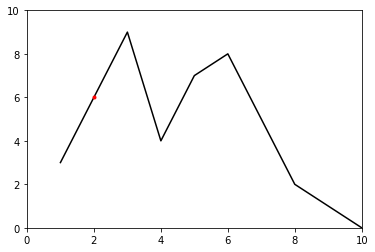

-1


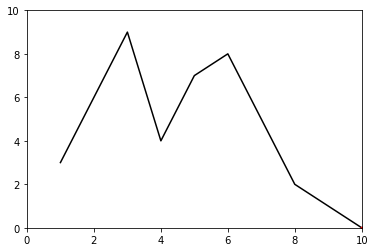

-1


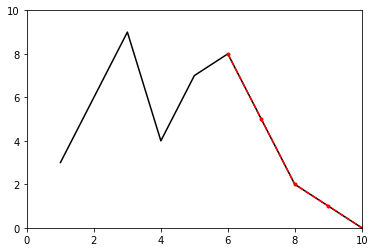

40


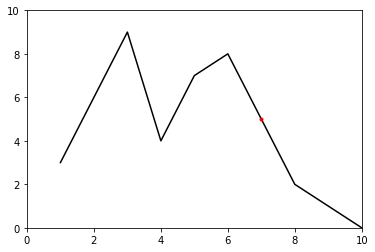

-1


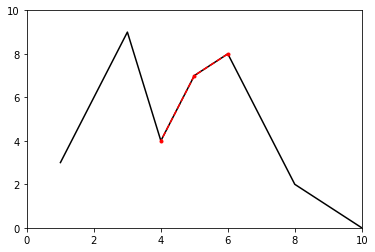

15


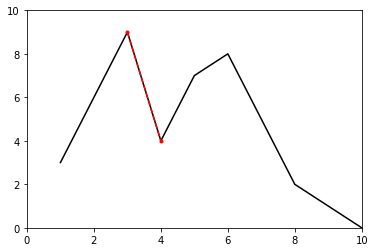

7


In [ ]:
import matplotlib.pyplot as plt
(n, q) = [int(x) for x in input().split(' ')]

h = []
a = []
[h.append(int(x)) for x in input().split(' ')]
[a.append(int(x)) for x in input().split(' ')]

x = []
for i in range (n):
    x.append(i+1)
    
zmax = 0
for i in h :
    if zmax < i:
        zmax = i
        
query = []
for i in range (q):
    query.append(input())

print ("")

for j in query :
    (p, b, c) = [int(x) for x in j.split(' ')]
    ada = b
    jalur_z = [h[b-1]]
    jalur_x = [x[b-1]]
    jawab = a[b-1]
    if p==1:
        a[b-1]=c
    if p==2:
        if c-b > 0 :
            while b!=c:
                check = []
                for k in range (b,c,1):
                    if (h[k]-h[b-1])/(k-(b-1))<0:
                        for l in range (b,k+1):
                            if ((((h[k]-h[b-1])*(l-(b-1)))/(k-(b-1)))+h[b-1])<h[l]:
                                break
                            if l == k :
                                check.append(k)
                if len (check)== 0:
                    break
                hmax = 0
                for m in check :
                    if hmax <= h[m]:
                        hmax = h[m]
                        b = m+1
                jawab +=a[b-1]
                jalur_z.append(h[b-1])
                jalur_x.append(x[b-1])
                
        if c-b < 0 :
            while b!=c:
                check = []
                for k in range (b-2,c-2,-1):##
                    if (h[k]-h[b-1])/(k-(b-1))>0:
                        for l in range (b-2,k-1,-1):
                            if ((((h[k]-h[b-1])*(l-(b-1)))/(k-(b-1)))+h[b-1])<h[l]:
                                break
                            if l == k :
                                check.append(k)
                if len (check)== 0:
                    break
                hmax = 0
                for m in check :
                    if hmax <= h[m]:
                        hmax = h[m]
                        b = m+1
                jawab +=a[b-1]
                jalur_z.append(h[b-1])
                jalur_x.append(x[b-1])
        
        plt.xlim(0,n)
        plt.ylim(0,zmax +1)
        plt.plot(x,h,color='black',)
        plt.plot(jalur_x,jalur_z,color='r',marker=".",linestyle = "--")
        plt.show()
        
        if ada == b:
            print (-1)
        else:
            print (jawab)